#### Ex 14.0

In [4]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from xgboost import XGBClassifier
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Custom function for plotting 1D plots
def plot_1d(x, c="Survived"):
    y = "stub"
    df[y] = 0
    plot_2d(x, y)
    del df[y]

# Custom function for plotting 2D plots
def plot_2d(x, y, c="Survived"):
    df.groupby([x, y])[c]\
        .mean()\
        .reset_index()\
        .plot(kind='scatter', x=x, y=y, c=c, colormap='viridis')

# Custom funciton for plotting 3D plots
def plot_3d(x, y, z, c="Survived"):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    dfm = df.groupby([x, y, z])[c].mean().reset_index()
    
    # Creating the plot
    sc = ax.scatter(xs=dfm[x], ys=dfm[y], zs=dfm[z], c=dfm[c], cmap='viridis', edgecolor='k', s=40, alpha=0.7)
    
    # Adding color bar
    plt.colorbar(sc, ax=ax, label=c)
    
    # Setting the labels
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    
    # Title
    ax.set_title('3D Scatter Plot')
    
    plt.show()

def plot_predictions(x, y, z, model, df_x, df_y):
    # Initialize plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Predict on the entire dataset
    predictions = model.predict(df_x)
    
    # Plot correctly classified points
    correct_survived = df_x[(df_y == 1) & (predictions == 1)]
    correct_not_survived = df_x[(df_y == 0) & (predictions == 0)]
    ax.scatter(correct_survived[x], correct_survived[y], correct_survived[z], c='g', marker='o', label='Correctly Survived')
    ax.scatter(correct_not_survived[x], correct_not_survived[y], correct_not_survived[z], c='r', marker='x', label='Correctly Not Survived')
    
    # Plot incorrectly classified points
    incorrect_survived = df_x[(df_y == 1) & (predictions == 0)]
    incorrect_not_survived = df_x[(df_y == 0) & (predictions == 1)]
    ax.scatter(incorrect_survived[x], incorrect_survived[y], incorrect_survived[z], c='orange', marker='o', label='Incorrectly Predicted as Survived')
    ax.scatter(incorrect_not_survived[x], incorrect_not_survived[y], incorrect_not_survived[z], c='purple', marker='x', label='Incorrectly Predicted as Not Survived')
    
    # Set labels
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    
    plt.legend()
    plt.show()

#### Ex 14.1

In [5]:
df = train_df = pd.read_csv("clean_train_titanic.csv")
df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,CatSex,CatEmbarked,CatAge,CatFare
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,0,4,0.0
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,1,7,7.0
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,0,5,0.0
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,0,6,5.0
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,0,0,5,1.0
887,19.000000,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,1,0,3,2.0
888,23.576044,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,1,0,4,2.0
889,26.000000,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,0,1,5,2.0


#### Ex 14.2

In [6]:
df = df.drop(['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked'],axis=1)
df

,Parch,Pclass,SibSp,Survived,CatSex,CatEmbarked,CatAge,CatFare
0,0,3,1,0.0,0,0,4,0.0
1,0,1,1,1.0,1,1,7,7.0
2,0,3,0,1.0,1,0,5,0.0
3,0,1,1,1.0,1,0,6,5.0
4,0,3,0,0.0,0,0,6,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,0.0,0,0,5,1.0
887,0,1,0,1.0,1,0,3,2.0
888,2,3,1,0.0,1,0,4,2.0
889,0,1,0,1.0,0,1,5,2.0


#### Ex 14.3

<Axes: >

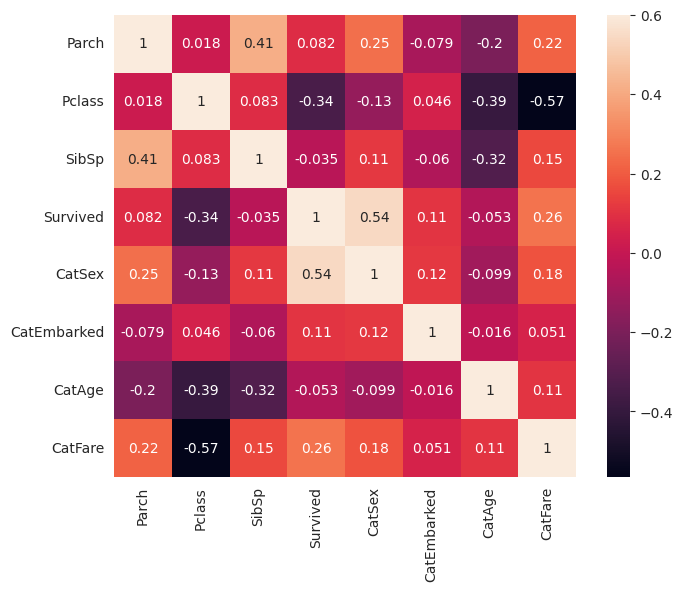

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

#### Ex 14.4

In [ ]:
plot_1d(x=_________)

#### Ex 14.5

In [ ]:
plot_2d(x=________, y=__________)

#### Ex 14.6

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='Pclass', hue='Survived', data=train_df.loc[train_df['CatSex'] == True], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='Pclass', hue='Survived', data=train_df.loc[train_df['CatSex'] == False], ax=axs[1])

#### Ex 14.7

In [ ]:
plot_3d(________, ________, ________)

#### Ex 14.8

In [ ]:
Columns = ['Parch', 'Pclass', 'SibSp', 'CatSex', 'CatEmbarked', 'CatAge', 'CatFare']
Label = 'Survived'

#### Ex 14.9

In [ ]:
from sklearn.model_selection import train_test_split

x = df[Columns]
y = df[Label]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 5, stratify = y)

#### Ex 14.9.1

In [ ]:
# Print the train X dataframe
_______

#### Ex 14.9.2

In [ ]:
# Print the test X dataframe
_______

#### Ex 14.10

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

#### Ex 14.10.1

In [ ]:
# Get feature importances
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure()
plt.title("Feature Importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(train_x.shape[1]), train_x.columns[indices], rotation='vertical')
plt.xlim([-1, train_x.shape[1]])
plt.show()

#### Ex 14.10.2

In [ ]:
plot_3d(_______, _______, _______)

#### Ex 14.10.3

In [ ]:
dt.score(test_x, test_y)

#### Ex 14.10.4

In [ ]:
plot_predictions('CatSex', 'CatAge', 'Pclass', model=dt, df_x=test_x, df_y=test_y)

#### Ex 14.10.5

In [ ]:
plot_predictions('CatSex', 'CatAge', 'Pclass', model=dt, df_x=train_x, df_y=train_y)

#### Ex 14.10.6

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(dt, feature_names=Columns, filled=True)

#### Ex 14.11

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(train_x, train_y)

#### Ex 14.11.1

In [ ]:
# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure()
plt.title("Feature Importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(train_x.shape[1]), train_x.columns[indices], rotation='vertical')
plt.xlim([-1, train_x.shape[1]])
plt.show()

#### Ex 14.11.2

In [ ]:
plot_3d(_______, _______, _______)

#### Ex 14.11.3

In [ ]:
rf.score(test_x, test_y)

#### Ex 14.11.4

In [ ]:
plot_predictions('CatSex', 'CatAge', 'CatFare', model=rf, df_x=test_x, df_y=test_y)

#### Ex 14.11.5

In [ ]:
plot_predictions('CatSex', 'CatAge', 'CatFare', model=rf, df_x=train_x, df_y=train_y)

#### Ex 14.12

In [ ]:
from sklearn.svm import SVC

# Initialize and train SVM classifier
svm = SVC()
svm.fit(train_x, train_y)

#### Ex 14.12.1

In [ ]:
from sklearn.inspection import permutation_importance

# Assuming you have already trained your SVC model
perm_importance = permutation_importance(svm, test_x, test_y)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), train_x.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()

#### Ex 14.12.2

In [ ]:
# Evaluate the classifier
svm_score = svm.score(test_x, test_y)
print("SVM Classifier Score:", svm_score)

#### Ex 14.12.3

In [ ]:
plot_predictions('CatSex', 'CatAge', 'SibSp', model=svm, df_x=test_x, df_y=test_y)

#### Ex 14.12.4

In [ ]:
plot_predictions('CatSex', 'CatAge', 'SibSp', model=svm, df_x=train_x, df_y=train_y)

#### Ex 14.13

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN classifier
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)

#### Ex 14.13.1

In [ ]:
from sklearn.inspection import permutation_importance

# Assuming you have already trained your KNN model
perm_importance = permutation_importance(knn, test_x, test_y)
sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), train_x.columns[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance (Permutation)')
plt.show()


#### Ex 14.13.2

In [ ]:
# Evaluate the classifier
knn_score = knn.score(test_x, test_y)
print("KNN Classifier Score:", knn_score)

#### Ex 14.13.3

In [ ]:
plot_predictions('CatSex', 'CatAge', 'CatFare', model=knn, df_x=test_x, df_y=test_y)

#### Ex 14.13.4

In [ ]:
plot_predictions('CatSex', 'CatAge', 'CatFare', model=knn, df_x=train_x, df_y=train_y)